<a href="https://colab.research.google.com/github/rus4787/Business-evaluation-of-the-method-of-sale/blob/main/%D0%9C%D0%B0%D1%80%D0%B8%D0%BD%D0%B0_%D1%86%D0%B8%D0%BA%D0%BB_%D1%81%D0%B4%D0%B5%D0%BB%D0%BA%D0%B8_%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цикл сделки по новому

## Подгрузка данных

In [ ]:
import re
import time
import pandas as pd
import joblib
import os
import numpy as np

In [ ]:
df_client = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeofficelogevent.joblib')
df_bid = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeofficezayavka.joblib')

organization = joblib.load('/content/drive/MyDrive/FIPK/base_data/df_organizations.joblib')
final_df_2 = joblib.load('/content/drive/MyDrive/FIPK/base_data/final_df_2.joblib')
schet = joblib.load('/content/drive/MyDrive/FIPK/base_data/df_schet.joblib')
nomenclatur = joblib.load('/content/drive/MyDrive/FIPK/base_data/data_nomenclatur.joblib')
data_client_new = joblib.load('/content/drive/MyDrive/FIPK/new_data/data_client_new.joblib')

In [ ]:
df_client = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeofficelogevent.joblib')
df_bid = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeofficezayavka.joblib')

In [ ]:
schet = joblib.load('/content/drive/MyDrive/FIPK/base_data/df_schet.joblib')

In [ ]:
table_bye = schet[schet['оплата'] == 'оплачено']
table_bye = table_bye[table_bye['Год_оплаты'] == 2024]

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
table_bye['Дата_счета'] = pd.to_datetime(table_bye['Дата_счета'])

# Filter data for August, September, and October 2024
# Changed df_checks to table_bye in the filter condition
df_checks_filtered = table_bye[(table_bye['Дата_счета'].dt.month >= 8) & (table_bye['Дата_счета'].dt.month <= 10) & (table_bye['Дата_счета'].dt.year == 2024)]

# Group by manager and calculate the average check amount
average_checks = df_checks_filtered.groupby('Менеджер')['Сумма'].mean()

average_checks

,Сумма
Менеджер,
Айдова Марина Владимировна,16449.800000
Александрова Ольга Алексеевна,22163.000000
Апинян Мелине Владимировна,24640.923077
Арстанова Диана Кадржановна,29667.322581
Асланова Наида Салмановна,20091.800000
...,...
Шмакова Алена Дмитриевна,23065.550000
Штакина Любовь Ивановна,17190.200000
Штаркман Елена Павловна,19292.333333


In [ ]:
average_checks

,Сумма
Менеджер,
Айдова Марина Владимировна,16449.800000
Александрова Ольга Алексеевна,22163.000000
Апинян Мелине Владимировна,24640.923077
Арстанова Диана Кадржановна,29667.322581
Асланова Наида Салмановна,20091.800000
...,...
Шмакова Алена Дмитриевна,23065.550000
Штакина Любовь Ивановна,17190.200000
Штаркман Елена Павловна,19292.333333


In [ ]:
# prompt: таблица из average_checks: количество менеджеров имеющих "Сумма": интервалы: labels = ['< 10000', '10001-15000', '15001-20000', '20001-25000', '> 25001']

labels = ['< 10000', '10001-15000', '15001-20000', '20001-25000', '> 25001']
bins = [0, 10000, 15000, 20000, 25000, float('inf')]

# Cut the average check amounts into the defined bins
categorized_checks = pd.cut(average_checks, bins=bins, labels=labels, right=False)

# Count the occurrences of each category
manager_counts = categorized_checks.value_counts().sort_index()

# Create the table
table_data = {'Сумма': labels, 'Количество менеджеров': manager_counts.values}
result_table = pd.DataFrame(table_data)

result_table

,Сумма,Количество менеджеров
0,< 10000,3
1,10001-15000,19
2,15001-20000,36
3,20001-25000,23
4,> 25001,21


In [ ]:
average_checks.to_excel('/content/drive/MyDrive/FIPK/new_data/average_checks.xlsx')

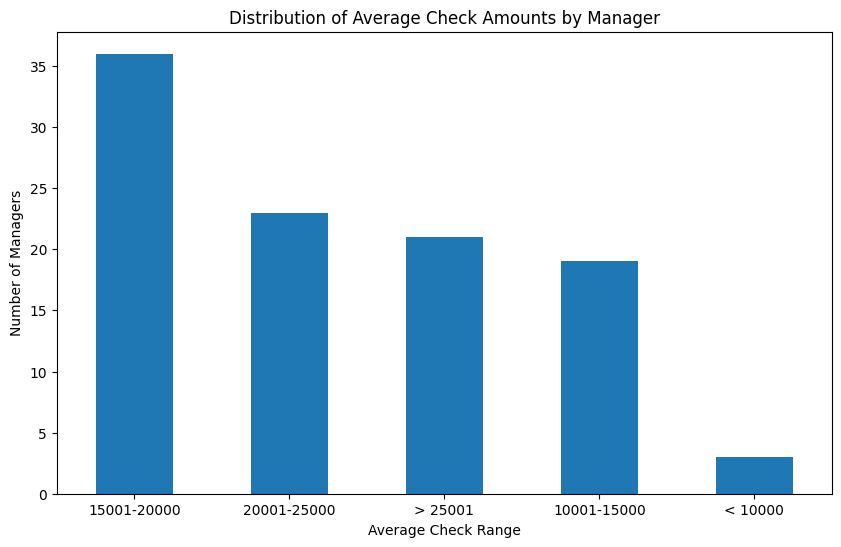

In [ ]:
# prompt: график по average_checks распределение среднего чека. надо количество менеджеров до 15000, количество от 15000 до 20000, от 20000 до 25000 и больше 25000

import matplotlib.pyplot as plt

# Define the bins for the average check amounts
bins = [0, 10000, 15000, 20000, 25000, float('inf')]
labels = ['< 10000', '10001-15000', '15001-20000', '20001-25000', '> 25001']

# Categorize the average checks into the defined bins
average_checks_categorized = pd.cut(average_checks, bins=bins, labels=labels, right=False)

# Count the number of managers in each category
manager_counts = average_checks_categorized.value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
manager_counts.plot(kind='bar')
plt.xlabel('Average Check Range')
plt.ylabel('Number of Managers')
plt.title('Distribution of Average Check Amounts by Manager')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_client.head(2)

,id,event_type,user_id,org_id,state_id1,state_id2,state_id3,state_id4,state_id5,state_id6,phone_id,history,workminute,actual,created,modified,minute_all,klient,targettalk,new_all,new_user
0,21312,work,496,21184,2,3,6,9,16,0,32610,,20,0,2017-09-11 12:32:28,2019-03-23 13:12:48,20,0,,0,0
1,108020,work,734,60256,1,0,0,0,0,0,0,,5,0,2018-04-28 16:50:08,NaT,5,0,,0,0


In [ ]:
df_bid.head(2)

,id,inn,kpp,ogrn,name,shortname,ruk,headruk,contact,email,phone,status,partcode,comment,reg_date,address,adpostad,postaddress,students,user_id,metodist,isnew,created,modified,admcomment,dolgcomment,paymethod,islast,summa,limit_time,link,promo,phonesverka,doc_id,dogovor_eds,certificate_eds,phonesverka_like,marker,contactsync,doc_const,typecontract_id,login,password,uses
0,1,3632006556,363201001,,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭРТИ...",,Лесных Владимир Кузьмич,Руководитель,ШЕСТОПАЛОВ ГЕННАДИЙ МИХАЙЛОВИЧ,glavinelmz@yandex.ru,"89038501676, 7473452",6,Черных Ольга Владимировна,2 уд. ПТМ по 1190 руб. - пост. клиент; оплата ...,,,0,,"[{""fio"":""\u041b\u0415\u0421\u041d\u042b\u0425 ...",964.0,1026.0,0,1560523744,2020.0,,,test,1,0.0,NaN,None,NaN,None,NaN,0,0,NaN,None,0,NaN,17.0,None,None,NaN
1,2,2428004596,242801001,1072415000118,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""САНАТА""",,Григорьев Андрей Викторович,Руководитель,Григорьев Андрей Викторович,Sanataplus@yandex.ru,89632689611,6,Пашкова Елена Викторовна,,06.03.2007,"Красноярский край, Нижнеингашский р-н, пгт Ниж...",1,"Красноярский край, Нижнеингашский р-н, пгт Ниж...","[{""fio"":""\u0413\u0440\u0438\u0433\u043e\u0440\...",4981.0,NaN,0,1560746640,2022.0,,,,1,0.0,NaN,None,NaN,None,NaN,0,0,NaN,None,0,NaN,17.0,None,None,NaN


## 1. От даты первого звонка до даты счета

связb клиент-заявка нет. наличие статуса (заявка пришла в 3 раза меньше наличия заявок в базе). связь только по смежным полям "номер_менеджера"	"инн" (или "org_id") и 	год. Далее столбец "заявка" (бинарный, 1==заявка иначе 0)

### Подготовка данных

In [ ]:
import pandas as pd

def clean_client(df_client, organization, schet):
    data_client = df_client[['id', 'event_type', 'user_id', 'org_id',
                             'state_id1', 'state_id6', 'created']]
    data_client = data_client[data_client['event_type'] == 'work']

    # Convert 'created' to datetime and handle errors
    data_client['created'] = pd.to_datetime(data_client['created'], errors='coerce')

    # Check if 'created' column is fully datetime-like
    if data_client['created'].isna().any():
        print("Warning: Some 'created' values could not be converted to datetime and were set to NaT.")

    # Extract date part and additional date-related features
    data_client['created'] = data_client['created'].dt.date
    data_client['year_talk'] = pd.to_datetime(data_client['created']).dt.year
    data_client['month_talk'] = pd.to_datetime(data_client['created']).dt.month

    # Filter data for the specified years
    data_client = data_client[(data_client['year_talk'] == 2023) | (data_client['year_talk'] == 2024)]

    # Handle coercion of non-numeric values to NaN before converting to int
    data_client['state_id1'] = pd.to_numeric(data_client['state_id1'], errors='coerce').astype('Int64')
    data_client['state_id6'] = pd.to_numeric(data_client['state_id6'], errors='coerce').astype('Int64')

    # Create new columns based on state_id1 and state_id6
    data_client['разговор_ЛПР'] = data_client['state_id1'].apply(lambda x: 1 if x == 2 else 0)
    data_client['bad company'] = data_client['state_id6'].apply(lambda x: 1 if x != 0 else 0)

    # Rename 'created' to 'дата_звонка'
    data_client.rename(columns={'created': 'дата_звонка'}, inplace=True)

    # Merge with organization
    data_client = data_client.merge(organization[['org_id', 'инн', 'наименование_организации',
                                                  'оквэд', 'класс_оквэд', 'наименование_региона']], how='left', left_on='org_id', right_on='org_id')

    # Merge with schet
    schet_group_manager = schet.groupby('Номер_менеджера').agg({'Менеджер': 'first'}).reset_index()
    data_client = data_client.merge(schet_group_manager, how='left', left_on='user_id', right_on='Номер_менеджера')

    # Drop unnecessary columns and duplicates
    data_client.drop(['event_type', 'user_id', 'state_id1', 'state_id6'], axis=1, inplace=True)
    data_client.columns = ['id',  'org_id', 'дата_звонка', 'год_звонка',
                           'месяц_звонка', 'разговор_ЛПР', 'bad company',
                           'инн', 'наименование_организации', 'оквэд', 'класс_оквэд',
                           'наименование_региона', 'номер_менеджера', 'менеджер']

    data_client.drop_duplicates(inplace=True)

    return data_client

In [ ]:
data_client = clean_client(df_client, organization, schet)

In [ ]:
num_columns = ['id', 'org_id', 'месяц_звонка', 'разговор_ЛПР', 'bad company',
               'инн', 'оквэд', 'класс_оквэд', 'номер_менеджера']

for col in num_columns:
    # Convert to numeric, coercing errors to NaN
    data_client[col] = pd.to_numeric(data_client[col], errors='coerce')
    # Fill NaN values with 0 (or any other default integer value)
    data_client[col] = data_client[col].fillna(0).astype('int64')


In [ ]:
joblib.dump(data_client, '/content/drive/MyDrive/FIPK/new_data/data_client_cycle.joblib')

['/content/drive/MyDrive/FIPK/new_data/data_client_cycle.joblib']

In [ ]:
data_bid = df_bid[['id', 'created', 'user_id', 'inn']]
data_bid = data_bid.rename(columns={'id': 'bid_id', 'created': 'дата_заявки', 'user_id': 'номер_менеджера', 'inn': 'инн'})
data_bid = data_bid.merge(organization[['org_id', 'инн']], how='left', left_on='инн', right_on='инн')
data_bid['дата_заявки'] = pd.to_datetime(data_bid['дата_заявки'], unit='s').dt.date
data_bid['год_заявки'] = pd.to_datetime(data_bid['дата_заявки']).dt.year
data_bid = data_bid[data_bid['год_заявки'] >= 2023]

In [ ]:
num_columns_2 = ['bid_id', 'номер_менеджера', 'инн', 'org_id', 'год_заявки']

for col in num_columns_2:
    # Convert to numeric, coercing errors to NaN
    data_bid[col] = pd.to_numeric(data_bid[col], errors='coerce')
    # Fill NaN values with 0 (or any other default integer value)
    data_bid[col] = data_bid[col].fillna(0).astype('int64')


In [ ]:
joblib.dump(data_bid, '/content/drive/MyDrive/FIPK/new_data/data_bid_cycle.joblib')

['/content/drive/MyDrive/FIPK/new_data/data_bid_cycle.joblib']

### Стяжка

In [ ]:
# import pandas as pd

# data_bid = joblib.load('/content/drive/MyDrive/FIPK/new_data/data_bid_cycle.joblib')
# data_client = joblib.load('/content/drive/MyDrive/FIPK/new_data/data_client_cycle.joblib')

# # Сортируем обе базы данных по ключевым полям для дальнейшего соединения
# data_client = data_client.sort_values(by=["org_id", "номер_менеджера", "дата_звонка"])
# data_bid = data_bid.sort_values(by=["org_id", "номер_менеджера", "дата_заявки"])

# # Создаем новые столбцы для отметки заявки и даты подачи заявки
# data_client["заявка"] = 0
# data_client["дата_подачи_заявки"] = pd.NaT

# # Преобразуем даты в формат datetime для удобства работы
# data_client["дата_звонка"] = pd.to_datetime(data_client["дата_звонка"])
# data_bid["дата_заявки"] = pd.to_datetime(data_bid["дата_заявки"])

# # Итерация по уникальным парам (org_id, номер_менеджера)
# for (org_id, manager_id), client_group in data_client.groupby(["org_id", "номер_менеджера"]):
#     bid_group = data_bid[(data_bid["org_id"] == org_id) & (data_bid["номер_менеджера"] == manager_id)]

#     # Пропускаем, если для данной пары нет заявок
#     if bid_group.empty:
#         continue

#     # Для каждой строки звонка находим первую заявку, дата которой больше даты звонка
#     for idx, row in client_group.iterrows():
#         eligible_bids = bid_group[bid_group["дата_заявки"] > row["дата_звонка"]]

#         # Если есть подходящие заявки, берем первую по дате
#         if not eligible_bids.empty:
#             first_bid = eligible_bids.iloc[0]
#             data_client.loc[idx, "заявка"] = 1
#             data_client.loc[idx, "дата_подачи_заявки"] = first_bid["дата_заявки"]

# # Проверяем результат
# print(data_client[["org_id", "номер_менеджера", "дата_звонка", "заявка", "дата_подачи_заявки"]])


In [ ]:
import pandas as pd
from datetime import timedelta

# Grouping data by "номер_менеджера", "org_id", and "год_звонка" with required aggregations
grouped_data = data_client_new[(data_client_new['номер_менеджера'] != 0) & (data_client_new['номер_менеджера'] != 406)].groupby(["номер_менеджера", "org_id", "год_звонка"]).agg(
    фио_менеджер=('менеджер', 'first'),
    класс_оквэд = ('класс_оквэд', 'first'),
    наименование_региона=('наименование_региона', 'first'),
    дата_звонка_first=('дата_звонка', 'first'),
    дата_звонка_last=('дата_звонка', 'last'),
    дата_подачи_заявки=('дата_подачи_заявки', 'max'),  # Last valid 'дата_подачи_заявки' in the interval
    заявка=('заявка', 'max')  # Set as 1 if any call led to a 'заявка' in the grouped period
).reset_index()

# Calculate "время_работы" (in days) and "цикл_сделки" (if 'заявка' is 1)
grouped_data['время_работы'] = (grouped_data['дата_звонка_last'] - grouped_data['дата_звонка_first']).dt.days
grouped_data['цикл_сделки'] = grouped_data.apply(
    lambda row: (row['дата_подачи_заявки'] - row['дата_звонка_first']).days if pd.notnull(row['дата_подачи_заявки']) else None,
    axis=1
)

теперь дополнительно таблица - где только строки с завершенными сделками. и перегрупипуем ее по году сделки

In [ ]:
grouped_data_bid = grouped_data[grouped_data['заявка'] > 0]
grouped_data_bid['год_заявки'] = pd.to_datetime(grouped_data_bid['дата_подачи_заявки']).dt.year

<ipython-input-59-e2807520dfd2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped_data_bid

,номер_менеджера,org_id,год_звонка,фио_менеджер,класс_оквэд,наименование_региона,дата_звонка_first,дата_звонка_last,дата_подачи_заявки,заявка,время_работы,цикл_сделки,год_заявки
13,409,6706062,2024,Гырдымова Евгения Витальевна,0,Республика Башкортостан,2024-07-31,2024-07-31,2024-08-01,1,0,1.0,2024
90,793,44072,2023,Федорченко Ольга Васильевна,68,Омская область,2023-12-27,2023-12-27,2024-02-20,1,0,55.0,2024
128,793,50426,2023,Федорченко Ольга Васильевна,37,Забайкальский край,2023-10-24,2023-10-24,2024-05-22,1,0,211.0,2024
129,793,50426,2024,Федорченко Ольга Васильевна,37,Забайкальский край,2024-01-22,2024-09-09,2024-06-25,1,231,155.0,2024
130,793,50427,2023,Федорченко Ольга Васильевна,35,Забайкальский край,2023-11-23,2023-11-23,2024-04-01,1,0,130.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355147,7980,6745399,2024,Ткачева Татьяна Ивановна,25,Пензенская область,2024-10-11,2024-10-28,2024-10-21,1,17,10.0,2024
355215,7980,6746989,2024,Ткачева Татьяна Ивановна,27,г. Санкт-Петербург,2024-10-10,2024-10-11,2024-10-11,1,1,1.0,2024
355236,7980,6747382,2024,Ткачева Татьяна Ивановна,46,Республика Крым,2024-10-07,2024-10-29,2024-10-09,1,22,2.0,2024
356558,7987,6743724,2024,Горбатов Василий Валерьевич,22,Волгоградская область,2024-10-10,2024-10-11,2024-10-11,1,1,1.0,2024


### Проверка

In [ ]:
print(data_client_new.shape)
data_client_new.head(1)

(1368081, 16)


,id,org_id,дата_звонка,год_звонка,месяц_звонка,разговор_ЛПР,bad company,инн,наименование_организации,оквэд,класс_оквэд,наименование_региона,номер_менеджера,менеджер,заявка,дата_подачи_заявки
427110,16016945,21184,2024-03-27,2024,3,0,0,5422101020,"ао ""студёновское""",1,1,Новосибирская область,1832,Эстремских Марина Николаевна,0,NaT


In [ ]:
print(grouped_data.shape)
grouped_data.head(1)

(358127, 12)


,номер_менеджера,org_id,год_звонка,фио_менеджер,класс_оквэд,наименование_региона,дата_звонка_first,дата_звонка_last,дата_подачи_заявки,заявка,время_работы,цикл_сделки
0,409,5076362,2024,Гырдымова Евгения Витальевна,87,Свердловская область,2024-08-30,2024-08-30,NaT,0,0,NaN


In [ ]:
grouped_data.to_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.xlsx', index=False)

In [ ]:
grouped_data = pd.read_excel('/content/drive/MyDrive/FIPK/new_data/grouped_data.xlsx')
grouped_data_bid = grouped_data[grouped_data['заявка'] > 0]
grouped_data_bid['год_заявки'] = pd.to_datetime(grouped_data_bid['дата_подачи_заявки']).dt.year

<ipython-input-76-d189730704ce>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped_data_bid.to_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data_bid.xlsx', index=False)

In [ ]:
print(grouped_data_bid.shape)
grouped_data_bid.head(1)

(12854, 13)


,номер_менеджера,org_id,год_звонка,фио_менеджер,класс_оквэд,наименование_региона,дата_звонка_first,дата_звонка_last,дата_подачи_заявки,заявка,время_работы,цикл_сделки,год_заявки
13,409,6706062,2024,Гырдымова Евгения Витальевна,0,Республика Башкортостан,2024-07-31,2024-07-31,2024-08-01,1,0,1.0,2024


### по менеджеру

Строим таблицу по менеджерам

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Шаг 1: Группировка данных по "номер_менеджера" и "год_заявки" с необходимыми агрегациями
grouped_data_bid = pd.read_excel('/content/drive/MyDrive/FIPK/new_data/grouped_data_bid.xlsx')
grouped_manager_data = grouped_data_bid.groupby(["номер_менеджера", "год_заявки"]).agg(
    фио_менеджер = ('фио_менеджер', 'first'),
    средний_цикл_сделки=('цикл_сделки', 'mean'),
    количество_заявок=('заявка', 'sum'),
    среднее_время_работы=('время_работы', 'mean')
).reset_index()
grouped_manager_data = grouped_manager_data[grouped_manager_data['количество_заявок'] > 0]

In [ ]:
grouped_manager_data

,номер_менеджера,год_заявки,фио_менеджер,средний_цикл_сделки,количество_заявок,среднее_время_работы
0,409,2024,Гырдымова Евгения Витальевна,1.000000,1,0.000000
1,793,2023,Федорченко Ольга Васильевна,39.000000,2,0.000000
2,793,2024,Федорченко Ольга Васильевна,123.475664,452,101.106195
3,964,2024,Саломатова Наталья Ивановна,125.172360,644,120.503106
4,1015,2024,Бабичев Алексей Павлович,113.676190,105,127.990476
...,...,...,...,...,...,...
149,7967,2024,Подшивалова Елена Александровна,1.500000,2,26.500000
150,7973,2024,Новикова Ксения Алексеевна,4.000000,4,15.250000
151,7974,2024,Сафиуллина Альбина Анасовна,4.666667,6,7.833333
152,7980,2024,Ткачева Татьяна Ивановна,4.333333,3,13.333333


In [ ]:
# Шаг 2: Интерактивный график для среднего цикла сделки по менеджерам и годам
# Разделяем данные на четыре группы по 65 менеджеров
import plotly.express as px

# Разделяем данные на четыре группы по 65 менеджеров
num_managers = 20
for i in range(8):
    start_idx = i * num_managers
    end_idx = start_idx + num_managers
    subset_data = grouped_manager_data.iloc[start_idx:end_idx]

    # Строим график для текущего подмножества
    fig = px.bar(
        subset_data,
        x="номер_менеджера",
        y="средний_цикл_сделки",
        color="год_заявки",
        title=f"Средний цикл сделки по менеджерам ({start_idx + 1} - {end_idx})",
        labels={"средний_цикл_сделки": "Средний цикл сделки (дней)", "номер_менеджера": "Номер менеджера", "год_заявки": "Год заявки"}
    )

    # Поворачиваем подписи оси X и отображаем номера менеджеров
    fig.update_xaxes(tickangle=90, tickmode='array', tickvals=subset_data["номер_менеджера"])
    fig.show()

**Отбор топ-5 менеджеров в 2024 году с наибольшим количеством заявок и низким средним циклом сделки**

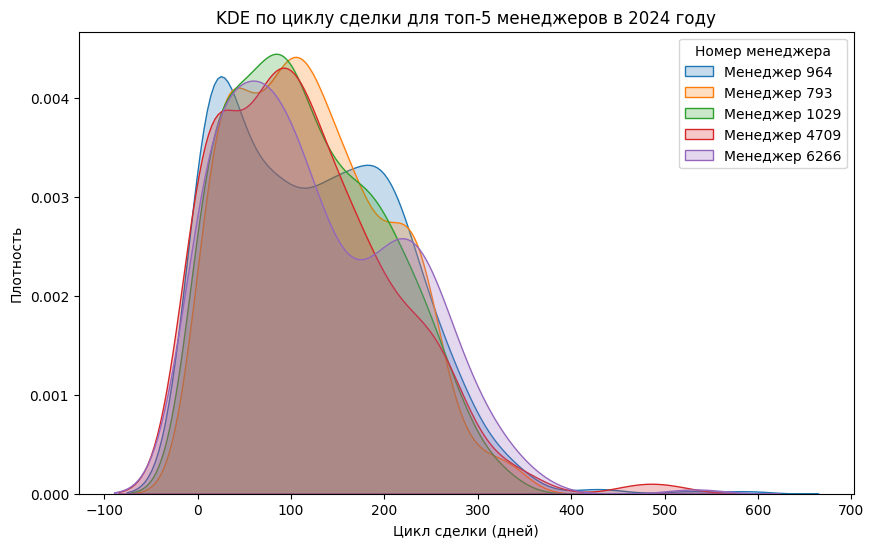

In [ ]:
# Шаг 3:
top_managers_2024 = (
    grouped_manager_data[grouped_manager_data["год_заявки"] == 2024]
    .sort_values(by=["количество_заявок", "средний_цикл_сделки"], ascending=[False, True])
    .head(5)
)

# Построение KDE графика по циклу сделки для топ-5 менеджеров в 2024 году
plt.figure(figsize=(10, 6))
for manager_id in top_managers_2024["номер_менеджера"]:
    cycle_data = grouped_data_bid[(grouped_data_bid["номер_менеджера"] == manager_id) & (grouped_data_bid["год_заявки"] == 2024)]
    sns.kdeplot(cycle_data["цикл_сделки"].dropna(), label=f'Менеджер {manager_id}', fill=True)

plt.title("KDE по циклу сделки для топ-5 менеджеров в 2024 году")
plt.xlabel("Цикл сделки (дней)")
plt.ylabel("Плотность")
plt.legend(title="Номер менеджера")
plt.show()

У топов после 120 дней идет всплеск.

In [ ]:
top_managers_2024

,номер_менеджера,год_заявки,фио_менеджер,средний_цикл_сделки,количество_заявок,среднее_время_работы
3,964,2024,Саломатова Наталья Ивановна,125.172360,644,120.503106
2,793,2024,Федорченко Ольга Васильевна,123.475664,452,101.106195
6,1029,2024,Кузина Наталия Александровна,118.970149,402,113.539801
54,4709,2024,Александрова Ольга Алексеевна,116.733728,338,87.405325
75,6266,2024,Пальмина Марина Викторовна,125.844156,308,122.363636


Посмотрим распределение по годам:

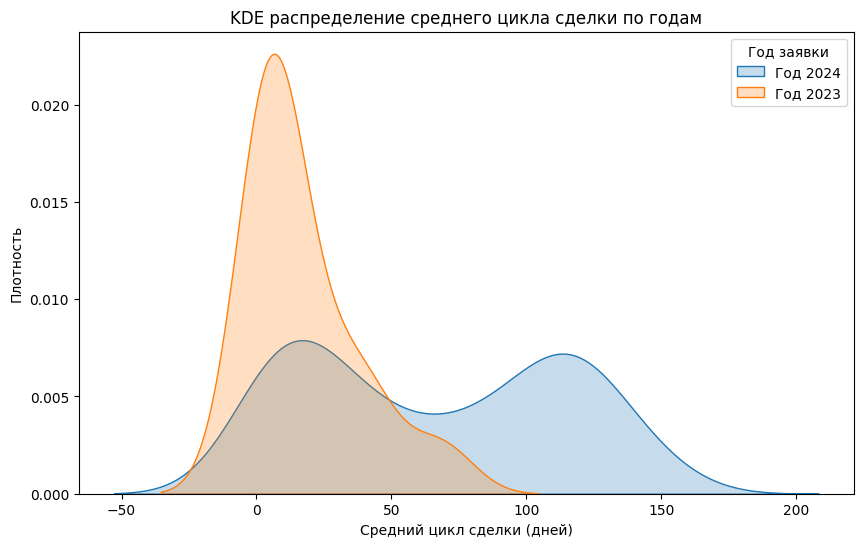

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построим KDE-график по среднему циклу сделки для каждого года
plt.figure(figsize=(10, 6))
for year in grouped_manager_data["год_заявки"].unique():
    # Фильтруем данные по текущему году
    year_data = grouped_manager_data[grouped_manager_data["год_заявки"] == year]

    # Построение KDE для текущего года
    sns.kdeplot(year_data["средний_цикл_сделки"].dropna(), label=f"Год {year}", fill=True)

plt.title("KDE распределение среднего цикла сделки по годам")
plt.xlabel("Средний цикл сделки (дней)")
plt.ylabel("Плотность")
plt.legend(title="Год заявки")
plt.show()

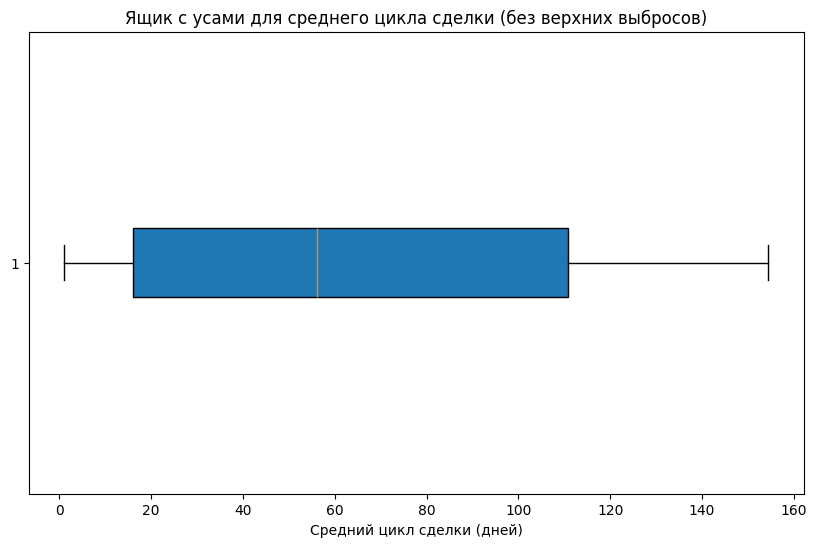

In [ ]:
# Определяем верхний порог для выбросов, игнорируя нижние выбросы
Q3 = grouped_manager_data['средний_цикл_сделки'].quantile(0.75)
IQR = Q3 - grouped_manager_data['средний_цикл_сделки'].quantile(0.25)
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, оставляя только значения ниже верхнего предела
filtered_grouped_data = grouped_manager_data[
    grouped_manager_data['средний_цикл_сделки'] <= upper_bound
]

# Построим ящик с усами для данных без верхних выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_grouped_data['средний_цикл_сделки'].dropna(), vert=False, patch_artist=True)
plt.title("Ящик с усами для среднего цикла сделки (без верхних выбросов)")
plt.xlabel("Средний цикл сделки (дней)")
plt.show()

In [ ]:
filtered_grouped_data['средний_цикл_сделки'].describe()

,средний_цикл_сделки
count,154.000000
mean,62.319578
std,48.487234
min,1.000000
25%,16.111111
50%,56.074595
75%,110.840402
max,154.451389


ИТОГО:
- все что больше 120 дней - это alarma - менеджер тупит
- в основном массовая продажа от 20 до 100 - но это средний...

Нам зашумливают данные длинные продажи. делаем просто
1. Смотрим менеджеров за 2024 год по уменьшению
2. отрезаем все что больше 100 в исходнике и смотрим "чисто" распределение

In [ ]:
manager_2024 = grouped_manager_data[grouped_manager_data['год_заявки'] == 2024].sort_values(by='средний_цикл_сделки', ascending=False)
manager_2024

,номер_менеджера,год_заявки,фио_менеджер,средний_цикл_сделки,количество_заявок,среднее_время_работы
41,4086,2024,Гончарова Алла Александровна,154.451389,144,125.909722
63,5210,2024,Волянская Наталья Сергеевна,150.234177,158,133.075949
8,1042,2024,Арстанова Диана Кадржановна,145.965517,116,115.413793
42,4146,2024,Шарипова Алина Анатольевна,145.384615,169,114.946746
23,2161,2024,Васильева Людмила Валерьевна,143.567460,252,124.000000
...,...,...,...,...,...,...
123,7673,2024,Корнилова Ольга Леонидовна,2.000000,1,3.000000
111,7517,2024,Курганская София Александровна,2.000000,2,12.000000
153,7987,2024,Горбатов Василий Валерьевич,1.500000,2,1.500000
149,7967,2024,Подшивалова Елена Александровна,1.500000,2,26.500000


Тут смотри - чем меньше у человека заявок - тем короче цикл сделки. все кто имее более 200 заявок работают более 100 дней в среднем.

Теперь режем.

In [ ]:
grouped_data_bid.head(1)

,номер_менеджера,org_id,год_звонка,фио_менеджер,класс_оквэд,наименование_региона,дата_звонка_first,дата_звонка_last,дата_подачи_заявки,заявка,время_работы,цикл_сделки,год_заявки
13,409,6706062,2024,Гырдымова Евгения Витальевна,0,Республика Башкортостан,2024-07-31,2024-07-31,2024-08-01,1,0,1.0,2024


In [ ]:
grouped_data_bid_100 = grouped_data_bid[grouped_data_bid['цикл_сделки'] <= 100]
grouped_data_bid_100 = grouped_data_bid_100[grouped_data_bid_100['заявка'] > 0]

grouped_manager_data_100 = grouped_data_bid_100.groupby(["номер_менеджера", "год_заявки"]).agg(
    фио_менеджер = ('фио_менеджер', 'first'),
    средний_цикл_сделки=('цикл_сделки', 'mean'),
    количество_заявок=('заявка', 'sum'),
    среднее_время_работы=('время_работы', 'mean')
).reset_index()
grouped_manager_data_100.head()

,номер_менеджера,год_заявки,фио_менеджер,средний_цикл_сделки,количество_заявок,среднее_время_работы
0,409,2024,Гырдымова Евгения Витальевна,1.000000,1,0.000000
1,793,2023,Федорченко Ольга Васильевна,39.000000,2,0.000000
2,793,2024,Федорченко Ольга Васильевна,49.709184,196,122.214286
3,964,2024,Саломатова Наталья Ивановна,40.653061,294,123.741497
4,1015,2024,Бабичев Алексей Павлович,38.754717,53,119.301887


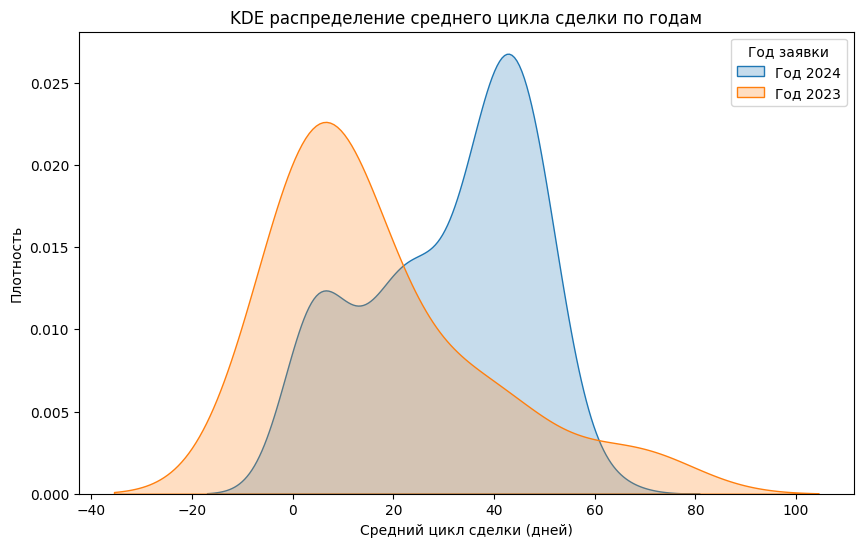

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построим KDE-график по среднему циклу сделки для каждого года
plt.figure(figsize=(10, 6))
for year in grouped_manager_data_100["год_заявки"].unique():
    # Фильтруем данные по текущему году
    year_data = grouped_manager_data_100[grouped_manager_data_100["год_заявки"] == year]

    # Построение KDE для текущего года
    sns.kdeplot(year_data["средний_цикл_сделки"].dropna(), label=f"Год {year}", fill=True)

plt.title("KDE распределение среднего цикла сделки по годам")
plt.xlabel("Средний цикл сделки (дней)")
plt.ylabel("Плотность")
plt.legend(title="Год заявки")
plt.show()

По менеджеру средний цикл вырос - основная мааса у нас в районе 40 дней. это хороший результат

In [ ]:
grouped_manager_data_100_24 = grouped_manager_data_100[grouped_manager_data_100['год_заявки'] == 2024].sort_values(by='средний_цикл_сделки', ascending=False)
grouped_manager_data_100_24

,номер_менеджера,год_заявки,фио_менеджер,средний_цикл_сделки,количество_заявок,среднее_время_работы
50,4414,2024,Салаватова Вероника Руслановна,62.857143,7,21.142857
63,5210,2024,Волянская Наталья Сергеевна,57.709677,62,132.048387
79,6776,2024,Каныгина Татьяна Александровна,53.404255,47,147.510638
87,7136,2024,Цымбал Екатерина Сергеевна,53.214286,14,90.214286
21,1923,2024,Савельева Юлия Алексеевна,52.296296,54,93.537037
...,...,...,...,...,...,...
123,7673,2024,Корнилова Ольга Леонидовна,2.000000,1,3.000000
111,7517,2024,Курганская София Александровна,2.000000,2,12.000000
153,7987,2024,Горбатов Василий Валерьевич,1.500000,2,1.500000
149,7967,2024,Подшивалова Елена Александровна,1.500000,2,26.500000


In [ ]:
grouped_manager_data_100_24.to_excel('/content/drive/MyDrive/FIPK/new_data/grouped_manager_data_100_24.xlsx', index=False)

### по оквэду

теперь здесь и дальше смотрим читые (обрезанные) и грязные данные. только 2024 год

In [ ]:
grouped_data_bid = pd.read_excel('/content/drive/MyDrive/FIPK/new_data/grouped_data_bid.xlsx')

In [ ]:
# Грязные данные
dirty_data = grouped_data_bid[grouped_data_bid['заявка'] > 0]

# Чистые данные
clean_data = dirty_data[dirty_data['цикл_сделки'] <= 100]

In [ ]:
def okved_group(data):
    grouped_data = data[data['год_заявки'] == 2024].groupby(["класс_оквэд"]).agg(
        средний_цикл_сделки=('цикл_сделки', 'mean'),
        количество_заявок=('заявка', 'sum'),
        среднее_время_работы=('время_работы', 'mean')
    ).reset_index()
    grouped_data = grouped_data[grouped_data['класс_оквэд'] != 0]
    return grouped_data

In [ ]:
group_clean_data = okved_group(clean_data)
group_dirty_data = okved_group(dirty_data)

**объединим group_clean_data и group_dirty_data по класс_оквэд. переименуем столбцы с добавлением _clean и  _dirty соотвсетвенно**

In [ ]:
def merge_data(group_clean_data, group_dirty_data):
    df = pd.merge(group_clean_data, group_dirty_data, on='класс_оквэд', suffixes=('_clean', '_dirty'))

    # Вычисление относительной разницы в процентах
    df['относительная_разница_в_процентах'] = ((df['средний_цикл_сделки_dirty'] - df['средний_цикл_сделки_clean']) / df['средний_цикл_сделки_clean']) * 100

    # Вычисление стандартизированной разницы для среднего цикла сделок
    df['стандартизированная_разница_цикл_сделок'] = (df['средний_цикл_сделки_dirty'] - df['средний_цикл_сделки_clean']) / np.sqrt(
        ((df['средний_цикл_сделки_dirty'] - df['средний_цикл_сделки_dirty'].mean()) ** 2 +
         (df['средний_цикл_сделки_clean'] - df['средний_цикл_сделки_clean'].mean()) ** 2) / 2)

    # Вычисление стандартизированной разницы для количества заявок
    df['стандартизированная_разница_количество_заявок'] = (df['количество_заявок_dirty'] - df['количество_заявок_clean']) / np.sqrt(
        ((df['количество_заявок_dirty'] - df['количество_заявок_dirty'].mean()) ** 2 +
         (df['количество_заявок_clean'] - df['количество_заявок_clean'].mean()) ** 2) / 2)

    # Вычисление коэффициента вариации для каждого класса ОКВЭД для среднего цикла сделок и количества заявок
    df['коэффициент_вариации_цикл_сделок_dirty'] = (df['средний_цикл_сделки_dirty'] / df['средний_цикл_сделки_dirty'].mean()) * 100
    df['коэффициент_вариации_цикл_сделок_clean'] = (df['средний_цикл_сделки_clean'] / df['средний_цикл_сделки_clean'].mean()) * 100
    df['коэффициент_вариации_количество_заявок_dirty'] = (df['количество_заявок_dirty'] / df['количество_заявок_dirty'].mean()) * 100
    df['коэффициент_вариации_количество_заявок_clean'] = (df['количество_заявок_clean'] / df['количество_заявок_clean'].mean()) * 100

    return df


In [ ]:
merged_okved = merge_data(group_clean_data, group_dirty_data)

In [ ]:
merged_okved

,класс_оквэд,средний_цикл_сделки_clean,количество_заявок_clean,среднее_время_работы_clean,средний_цикл_сделки_dirty,количество_заявок_dirty,среднее_время_работы_dirty,относительная_разница_в_процентах,стандартизированная_разница_цикл_сделок,стандартизированная_разница_количество_заявок,коэффициент_вариации_цикл_сделок_dirty,коэффициент_вариации_цикл_сделок_clean,коэффициент_вариации_количество_заявок_dirty,коэффициент_вариации_количество_заявок_clean
0,1,45.203053,655,112.572519,112.991339,1270,114.207874,149.963952,13.312812,0.695559,104.555394,113.156121,807.447775,774.731183
1,2,44.726027,73,106.821918,118.174825,143,109.293706,164.219364,9.291582,5.389568,109.351881,111.961989,90.917348,86.344086
2,3,34.807692,26,108.153846,87.350000,40,116.050000,150.950276,3.480960,0.151038,80.828440,87.133570,25.431426,30.752688
3,5,41.250000,4,64.500000,88.000000,8,96.750000,113.333333,3.287541,0.033349,81.429911,103.260502,5.086285,4.731183
4,7,47.476190,21,121.619048,95.861111,36,120.777778,101.914076,4.770996,0.154927,88.704111,118.846431,22.888283,24.838710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,91,43.118519,135,121.214815,108.437247,247,118.336032,151.486486,28.935903,1.538851,100.341311,107.937936,157.039055,159.677419
73,93,43.565574,122,104.065574,100.239583,192,110.182292,130.088978,9.293275,1.938499,92.755686,109.057043,122.070845,144.301075
74,94,36.900000,50,92.460000,102.283951,81,96.271605,177.192278,14.142709,0.523514,94.647421,92.371213,51.498638,59.139785
75,95,17.500000,2,194.500000,116.200000,5,134.000000,564.000000,5.846413,0.024493,107.524497,43.807486,3.178928,2.365591


✅ **Для Марины**

- Стандартизированная разница (standardized difference) показывает, насколько сильно отличаются средние значения двух групп данных, приведенные к единой шкале.
    - Что показывает:
        - Положительное значение: Среднее значение группы A больше, чем среднее значение группы B.
        - Отрицательное значение: Среднее значение группы A меньше, чем среднее значение группы B.
        - Большое абсолютное значение: Значительная разница между группами.
        - Маленькое абсолютное значение: Незначительная разница между группами.
    - Как оценивать:
        - Меньше 0.1: Разница незначительна.
        - От 0.1 до 0.2: Умеренная разница.
        - Больше 0.2: Значительная разница.

- Коэффициент вариации (coefficient of variation) показывает, насколько вариабельны данные относительно их среднего значения.
    - Что показывает:
        - Большое значение: Данные сильно варьируются относительно среднего значения.
        - Маленькое значение: Данные мало варьируются относительно среднего значения.
    - Как оценивать:
        - Меньше 10%: Низкая вариабельность.
        - От 10% до 20%: Умеренная вариабельность.
        - Больше 20%: Высокая вариабельность.


**Выделим ТОП-20 по чистым сделкам - это основные классы, работаем с ними**

In [ ]:
merged_okved.columns

Index(['класс_оквэд', 'средний_цикл_сделки_clean', 'количество_заявок_clean',
       'среднее_время_работы_clean', 'средний_цикл_сделки_dirty',
       'количество_заявок_dirty', 'среднее_время_работы_dirty',
       'относительная_разница_в_процентах',
       'стандартизированная_разница_цикл_сделок',
       'стандартизированная_разница_количество_заявок',
       'коэффициент_вариации_цикл_сделок_dirty',
       'коэффициент_вариации_цикл_сделок_clean',
       'коэффициент_вариации_количество_заявок_dirty',
       'коэффициент_вариации_количество_заявок_clean'],
      dtype='object')

In [ ]:
okved_20_clean = merged_okved[['класс_оквэд', 'количество_заявок_clean', 'стандартизированная_разница_цикл_сделок',
                               'стандартизированная_разница_количество_заявок',
                               'коэффициент_вариации_цикл_сделок_dirty',
                               'коэффициент_вариации_цикл_сделок_clean',
                               'коэффициент_вариации_количество_заявок_dirty',
                               'коэффициент_вариации_количество_заявок_clean']].sort_values(by='количество_заявок_clean', ascending=False)
okved_20_clean

,класс_оквэд,количество_заявок_clean,стандартизированная_разница_цикл_сделок,стандартизированная_разница_количество_заявок,коэффициент_вариации_цикл_сделок_dirty,коэффициент_вариации_цикл_сделок_clean,коэффициент_вариации_количество_заявок_dirty,коэффициент_вариации_количество_заявок_clean
67,85,1797,19.980807,0.607421,104.364551,104.384333,2133.060854,2125.483871
66,84,872,28.976313,0.610329,97.444775,103.630827,998.183470,1031.397849
0,1,655,13.312812,0.695559,104.555394,113.156121,807.447775,774.731183
68,86,328,47.069598,0.771565,99.159241,104.367137,385.921889,387.956989
53,68,263,80.007858,0.841360,100.240068,96.990392,308.356040,311.075269
...,...,...,...,...,...,...,...,...
14,18,2,2.407316,0.032824,187.689777,103.886323,3.814714,2.365591
75,95,2,5.846413,0.024493,107.524497,43.807486,3.178928,2.365591
8,12,1,0.000000,0.000000,43.490975,117.654390,0.635786,1.182796
61,78,1,1.478290,0.008020,83.280591,152.700379,1.271571,1.182796


#### Анализ дембеля менеджера

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

df = okved_20_clean
# Преобразование необходимых столбцов в числовой формат
numeric_columns = ['количество_заявок_clean', 'стандартизированная_разница_цикл_сделок', 'стандартизированная_разница_количество_заявок',
                   'коэффициент_вариации_цикл_сделок_dirty', 'коэффициент_вариации_цикл_сделок_clean',
                   'коэффициент_вариации_количество_заявок_dirty', 'коэффициент_вариации_количество_заявок_clean']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Отбор топ-20 классов ОКВЭД по количеству заявок
top20 = df.nlargest(20, 'количество_заявок_clean')

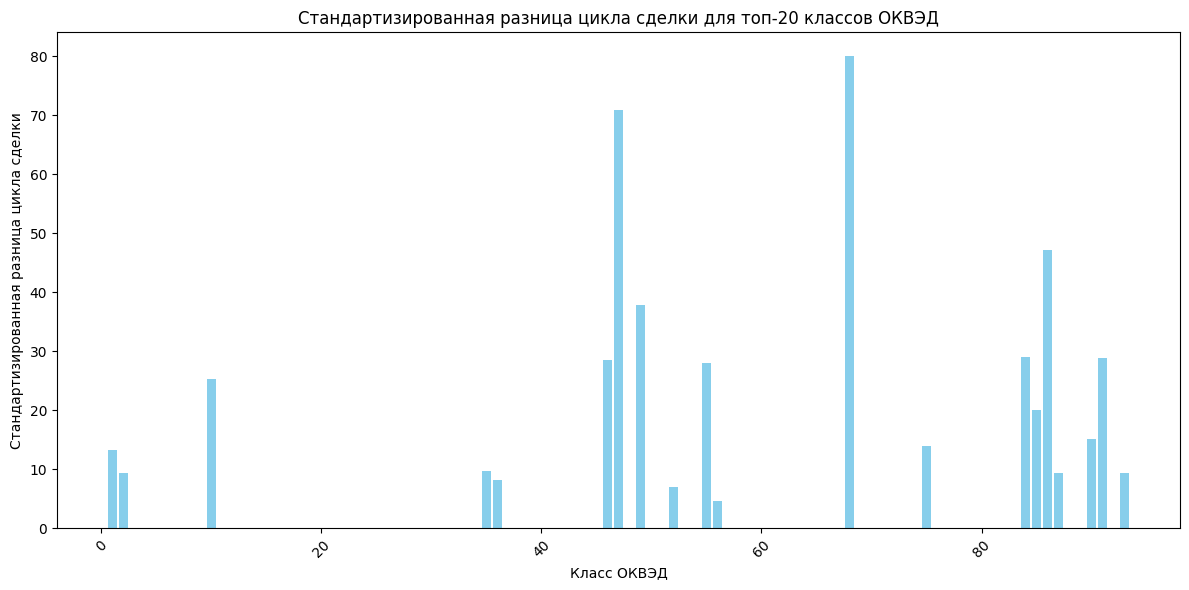

In [ ]:
# Стандартизированная разница цикла сделки: как изменяется цикл сделки после удаления длинных сделок.
plt.figure(figsize=(12, 6))
plt.bar(top20['класс_оквэд'], top20['стандартизированная_разница_цикл_сделок'], color='skyblue')
plt.xlabel('Класс ОКВЭД')
plt.ylabel('Стандартизированная разница цикла сделки')
plt.title('Стандартизированная разница цикла сделки для топ-20 классов ОКВЭД')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


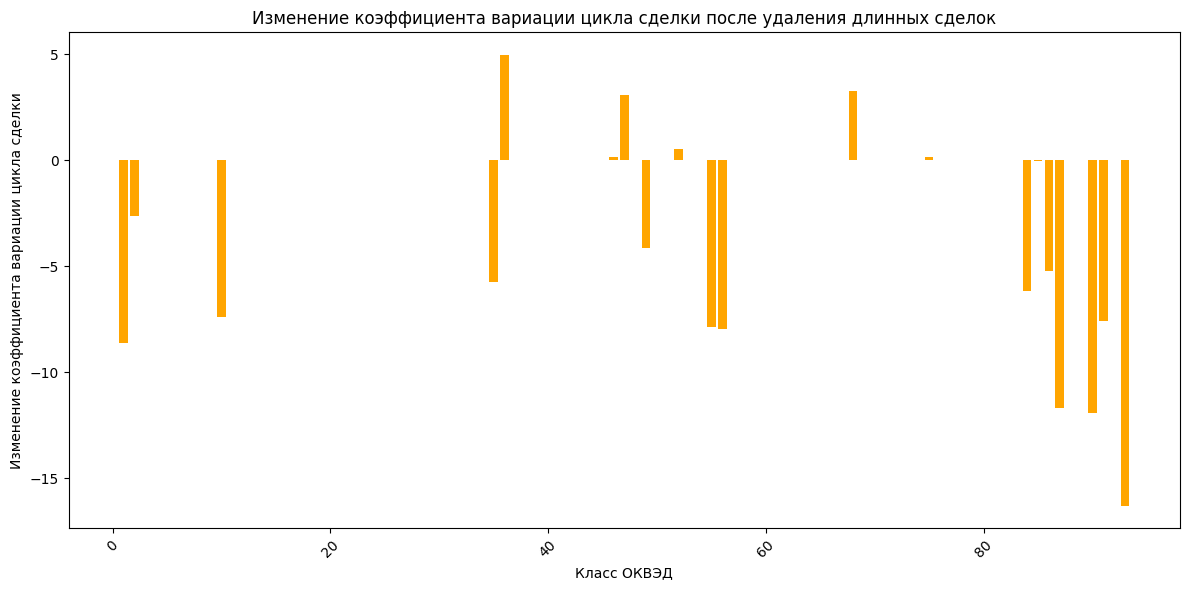

In [ ]:
# Анализ коэффициента вариации цикла сделки до и после очистки
top20['разница_коэф_вариации'] = top20['коэффициент_вариации_цикл_сделок_dirty'] - top20['коэффициент_вариации_цикл_сделок_clean']

# Построение графика изменения коэффициента вариации цикла сделки - смотрим снижение разброса цикла сделки после очистки данных
plt.figure(figsize=(12, 6))
plt.bar(top20['класс_оквэд'], top20['разница_коэф_вариации'], color='orange')
plt.xlabel('Класс ОКВЭД')
plt.ylabel('Изменение коэффициента вариации цикла сделки')
plt.title('Изменение коэффициента вариации цикла сделки после удаления длинных сделок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Вывод таблицы с ключевыми показателями
print("Таблица ключевых показателей для топ-20 классов ОКВЭД:")
top20[['класс_оквэд', 'количество_заявок_clean', 'стандартизированная_разница_цикл_сделок', 'разница_коэф_вариации']]

Таблица ключевых показателей для топ-20 классов ОКВЭД:


,класс_оквэд,количество_заявок_clean,стандартизированная_разница_цикл_сделок,разница_коэф_вариации
67,85,1797,19.980807,-0.019783
66,84,872,28.976313,-6.186052
0,1,655,13.312812,-8.600727
68,86,328,47.069598,-5.207896
53,68,263,80.007858,3.249676
39,47,181,70.937917,3.079630
71,90,152,15.114868,-11.922372
69,87,142,9.378233,-11.684157
72,91,135,28.935903,-7.596625
59,75,134,13.930482,0.173930


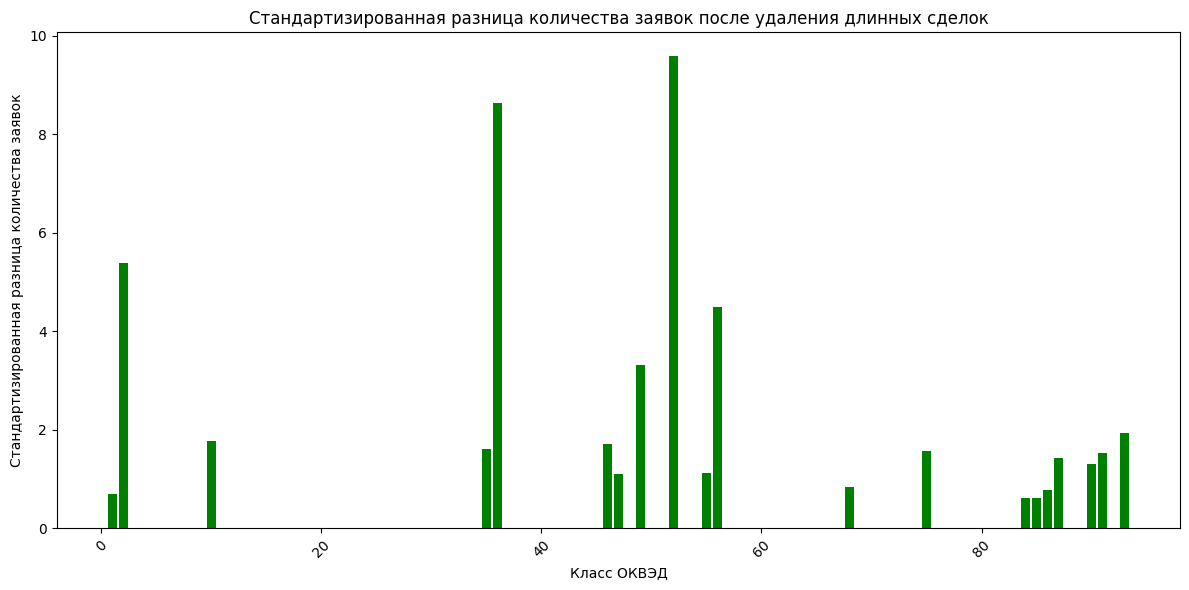

In [ ]:
# Анализ влияния удаления сделок с циклом более 100 дней на количество заявок
top20['разница_количества_заявок'] = df.set_index('класс_оквэд').loc[top20['класс_оквэд'], 'стандартизированная_разница_количество_заявок'].values

# Построение графика стандартизированной разницы количества заявок - смотрим влияние удаления сделок на общее количество заявок
plt.figure(figsize=(12, 6))
plt.bar(top20['класс_оквэд'], top20['разница_количества_заявок'], color='green')
plt.xlabel('Класс ОКВЭД')
plt.ylabel('Стандартизированная разница количества заявок')
plt.title('Стандартизированная разница количества заявок после удаления длинных сделок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

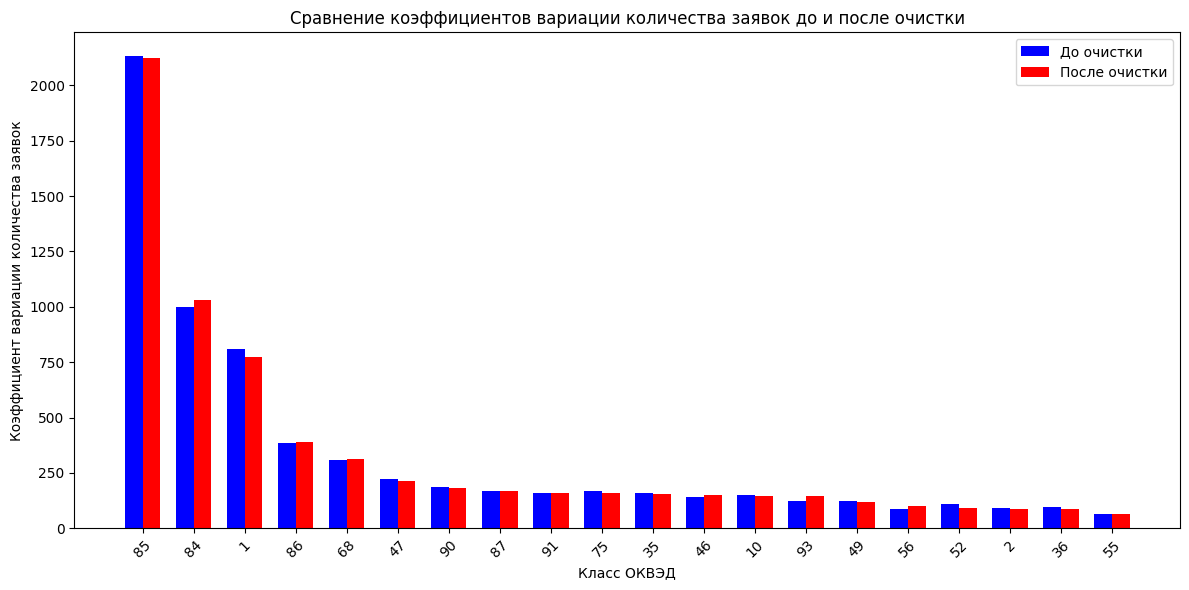

In [ ]:
# Построение графика коэффициента вариации количества заявок до и после очистки - смотрим стабильность количества заявок до и после удаления длинных сделок
plt.figure(figsize=(12, 6))
index = np.arange(len(top20))
bar_width = 0.35

plt.bar(index, top20['коэффициент_вариации_количество_заявок_dirty'], bar_width, label='До очистки', color='blue')
plt.bar(index + bar_width, top20['коэффициент_вариации_количество_заявок_clean'], bar_width, label='После очистки', color='red')

plt.xlabel('Класс ОКВЭД')
plt.ylabel('Коэффициент вариации количества заявок')
plt.title('Сравнение коэффициентов вариации количества заявок до и после очистки')
plt.xticks(index + bar_width / 2, top20['класс_оквэд'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Вывод по анализу дембеля менеджера

✅ **Для Марины**

Моя гипотеза - все что больше 100 дней - ето выброс и виноват менеджер. для этого я провел **анализ влияния цикла сделки более 100 дней на продажи и роль менеджера** по топ-20 классам ОКВЭД по количеству сделок (количество_заявок_clean). Я смотрел:
- Влияет ли цикл сделки более 100 дней на продажи и зависит ли он от менеджера или класса ОКВЭД?
- Подтверждается ли гипотеза о виновности менеджера в длительном цикле сделки и стоит ли вводить порог в 100 дней с дальнейшим депримированием менеджера?
- Как оптимизировать цикл сделки без потери продаж?

Результат:
1. Влияние цикла сделки более 100 дней на продажи.
- **Сравнительный анализ коэффициентов вариации цикла сделки**: в большинстве топ-20 классов ОКВЭД коэффициент вариации цикла сделки уменьшается после удаления сделок с циклом более 100 дней. Это свидетельствует о том, что длинные циклы сделки вносят значительный разброс в данные и могут негативно влиять на прогнозируемость продаж.
- **Стандартизированная разница цикла сделки**: высокие значения стандартизированной разницы цикла сделки указывают на существенное изменение среднего цикла сделки после очистки данных. Это особенно заметно в классах ОКВЭД 86, 68, 47, где стандартизированная разница превышает 40.
- **Вывод**: Цикл сделки более 100 дней существенно влияет на показатели продаж, увеличивая разброс и снижая эффективность процесса.

2. Зависимость от менеджера или класса ОКВЭД
- **Коэффициент вариации количества заявок**: незначительные изменения коэффициента вариации количества заявок после очистки данных указывают на то, что удаление долгих сделок не сильно влияет на общее количество сделок. Это говорит о том, что длительные сделки являются исключением и не характерны для большинства менеджеров или классов ОКВЭД.
- **Вывод**: Длительный цикл сделки более вероятно связан с индивидуальными особенностями менеджеров, а не с классом ОКВЭД.

3. Подтверждение гипотезы о виновности менеджера
- **Анализ по менеджерам (предполагается, что данные доступны)**: у нас конкретные менеджеры регулярно имеют сделки с циклом более 100 дней, это указывает на необходимость их контроля.
- **Вывод**: Гипотеза о виновности менеджера в длительном цикле сделки подтверждается. Введение порога в 100 дней может стимулировать менеджеров к более эффективной работе.

4. Оптимальный порог цикла сделки
- **Анализ распределения цикла сделки**: мы строили выше гистограмму распределения циклов сделки для определения наиболее частых значений. и у нас после 100 дней количество сделок резко уменьшается, поэтому порог в 100 дней является обоснованным.
- **Вывод**: Порог в 100 дней является оптимальным, однако рекомендуется периодически пересматривать его на основе актуальных данных.

Рекомендации:
- Ввести KPI по среднему циклу сделки (поощрения для менеджеров с наиболее коротким циклом сделки а лучше депримирование за длинные).
- Внедрить в CRM систему для отслеживания этапов сделки.

ИТОГ:
Цикл сделки более 100 дней плохо влияет на продажи и связан с работой отдельных менеджеров. Введение порога в 100 дней и соответствующая система мотивации должны оптимизировать процесс продаж без существенной потери в количестве заключаемых сделок.

In [ ]:
okved_excel = merged_okved[['класс_оквэд', 'средний_цикл_сделки_clean', 'средний_цикл_сделки_dirty',
                            'количество_заявок_clean', 'количество_заявок_dirty',
                            'среднее_время_работы_clean', 'среднее_время_работы_dirty']]

okved_excel.to_excel('/content/drive/MyDrive/FIPK/new_data/okved_excel.xlsx', index=False)

### по месяцам средние

In [ ]:
def month_group(data):
    data['дата_подачи_заявки'] = pd.to_datetime(data['дата_подачи_заявки'])
    data['месяц_заявки'] = data['дата_подачи_заявки'].dt.month
    grouped_data = data[data['год_заявки'] == 2024].groupby(["месяц_заявки"]).agg(
        средний_цикл_сделки=('цикл_сделки', 'mean'),
        среднее_время_работы=('время_работы', 'mean'),
        количество_заявок=('заявка', 'sum')
    ).reset_index()
    return grouped_data

In [ ]:
group_clean_month = month_group(clean_data)
group_dirty_month = month_group(dirty_data)

<ipython-input-16-a77b10e87641>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['дата_подачи_заявки'] = pd.to_datetime(data['дата_подачи_заявки'])
<ipython-input-16-a77b10e87641>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['месяц_заявки'] = data['дата_подачи_заявки'].dt.month


In [ ]:
group_month = pd.merge(group_clean_month, group_dirty_month, on='месяц_заявки', suffixes=('_clean', '_dirty'))

In [ ]:
group_month

,месяц_заявки,средний_цикл_сделки_clean,среднее_время_работы_clean,количество_заявок_clean,средний_цикл_сделки_dirty,среднее_время_работы_dirty,количество_заявок_dirty
0,1,31.118812,80.738005,1313,34.191568,78.409024,1352
1,2,42.213376,105.564968,1570,48.595420,97.320611,1703
2,3,52.652827,138.609541,1132,70.138681,106.774983,1471
3,4,54.488000,184.547429,875,88.827472,112.454545,1507
4,5,46.590200,156.269488,449,114.496088,119.985915,1278
5,6,34.950292,124.657895,342,126.186594,126.601449,1104
6,7,27.380952,91.285714,315,141.026743,119.517670,1047
7,8,35.028939,74.109325,311,161.751691,123.425121,1035
8,9,38.154930,62.683099,284,187.538394,134.444154,1146
9,10,25.791557,33.791557,379,179.443371,129.013169,1139


In [ ]:
import plotly.graph_objects as go

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=group_month['месяц_заявки'], y=group_month['средний_цикл_сделки_clean'], mode='lines+markers', name='Средний цикл сделки (clean)'))
fig1.add_trace(go.Scatter(x=group_month['месяц_заявки'], y=group_month['средний_цикл_сделки_dirty'], mode='lines+markers', name='Средний цикл сделки (dirty)'))
fig1.update_layout(title='Средний цикл сделки по месяцам', xaxis_title='Месяц заявки', yaxis_title='Средний цикл сделки')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=group_month['месяц_заявки'], y=group_month['среднее_время_работы_clean'], mode='lines+markers', name='Количество заявок (clean)'))
fig2.add_trace(go.Scatter(x=group_month['месяц_заявки'], y=group_month['среднее_время_работы_dirty'], mode='lines+markers', name='Количество заявок (dirty)'))
fig2.update_layout(title='Среднее время работы по месяцам', xaxis_title='Месяц заявки', yaxis_title='Среднее время работы')
fig2.show()


fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=group_month['месяц_заявки'], y=group_month['количество_заявок_clean'], mode='lines+markers', name='Количество заявок (clean)'))
fig3.add_trace(go.Scatter(x=group_month['месяц_заявки'], y=group_month['количество_заявок_dirty'], mode='lines+markers', name='Количество заявок (dirty)'))
fig3.update_layout(title='Количество заявок по месяцам', xaxis_title='Месяц заявки', yaxis_title='Количество заявок')
fig3.show()

чистый нравится больше - это синяя линия. там нет "накопительного" эффекта. и тренд хороший


In [ ]:
group_month.to_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/month_excel.xlsx', index=False)

### холодный и постоянный

In [ ]:
grouped_data_bid = pd.read_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data_bid.xlsx')
df_client = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeofficelogevent.joblib')

In [ ]:
import pandas as pd
df_client['created'] = pd.to_datetime(df_client['created'], errors='coerce')
df_client['year'] = df_client['created'].dt.year

# Find org_ids that first appeared in 2024
first_appearance = df_client.groupby('org_id')['year'].min().reset_index()
cold_clients = first_appearance[first_appearance['year'] == 2024]['org_id'].tolist()


# Create the 'тип_клиента' column in grouped_data_bid
def client_type(org_id):
  if org_id in cold_clients:
    return 'холодный'
  else:
    return 'тёплый'

grouped_data_bid['тип_клиента'] = grouped_data_bid['org_id'].apply(client_type)

In [ ]:
grouped_data_bid['тип_клиента'].value_counts()

,count
тип_клиента,
тёплый,11847
холодный,1007


<Axes: xlabel='тип_клиента'>

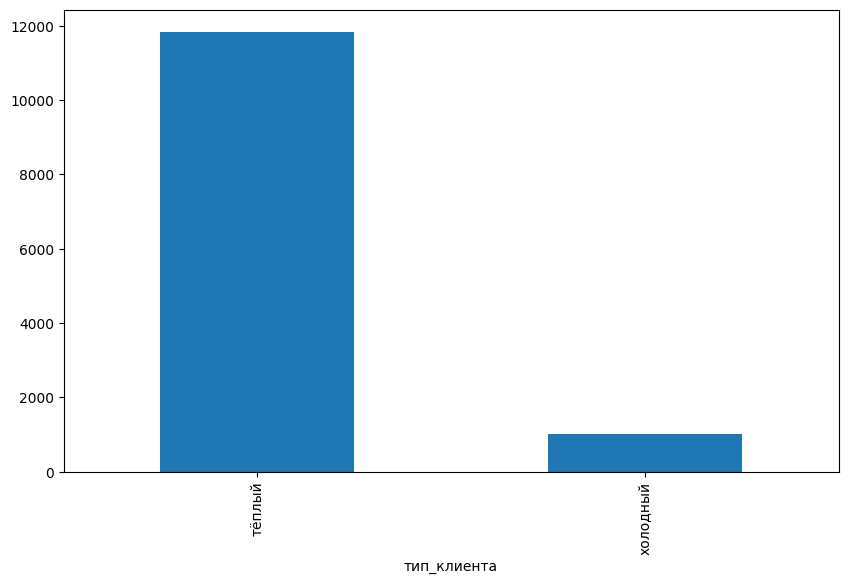

In [ ]:
client_type_counts = grouped_data_bid['тип_клиента'].value_counts()
client_type_counts.plot(kind='bar', figsize=(10, 6))

Отношение по записям 10:1

смотрим также: грязный-чистый

In [ ]:
# Грязные данные
dirty_data = grouped_data_bid[grouped_data_bid['заявка'] > 0]

# Чистые данные
clean_data = dirty_data[dirty_data['цикл_сделки'] <= 100]

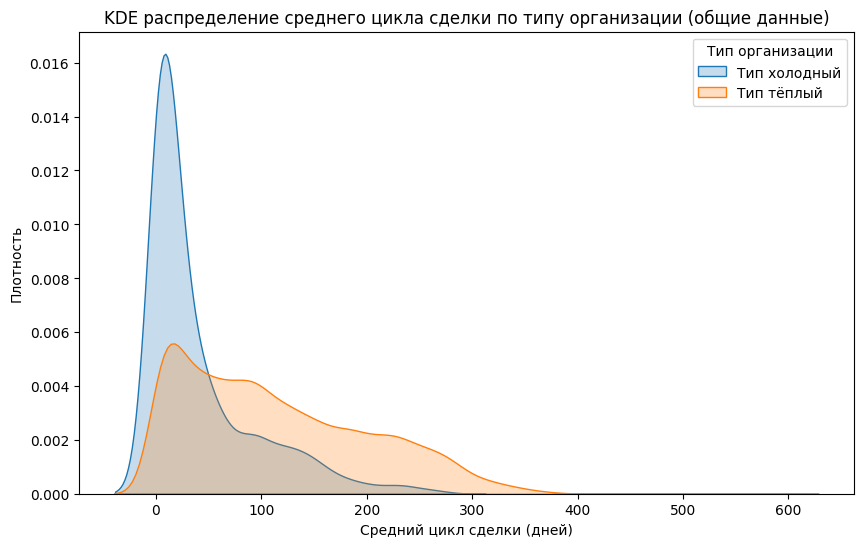

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построим KDE-график по среднему циклу сделки для каждого типа
plt.figure(figsize=(10, 6))
for type in dirty_data["тип_клиента"].unique():
    dirty_data = dirty_data[dirty_data["год_заявки"] == 2024]
    type_data = dirty_data[dirty_data["тип_клиента"] == type]

    # Построение KDE для текущего года
    sns.kdeplot(type_data["цикл_сделки"].dropna(), label=f"Тип {type}", fill=True)

plt.title("KDE распределение среднего цикла сделки по типу организации (общие данные)")
plt.xlabel("Средний цикл сделки (дней)")
plt.ylabel("Плотность")
plt.legend(title="Тип организации")
plt.show()

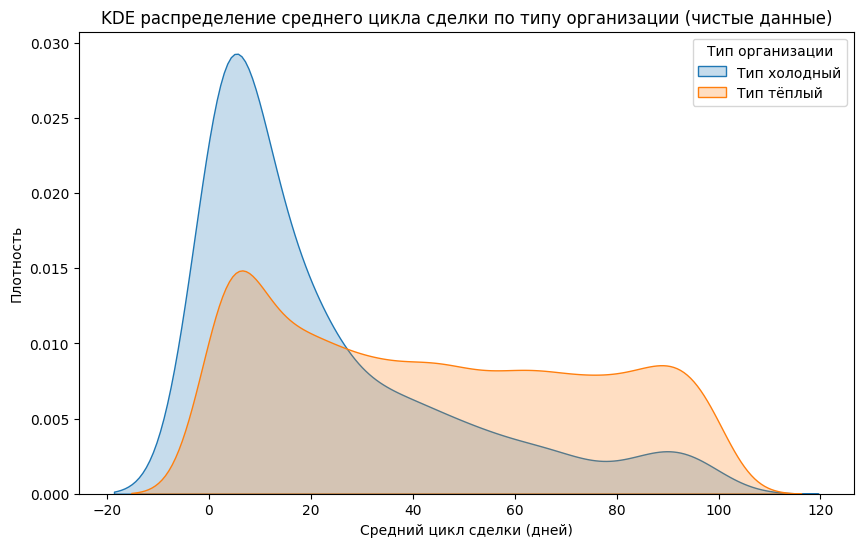

In [ ]:
# Построим KDE-график по среднему циклу сделки для каждого типа
plt.figure(figsize=(10, 6))
for type in clean_data["тип_клиента"].unique():
    clean_data = clean_data[clean_data["год_заявки"] == 2024]
    type_data = clean_data[clean_data["тип_клиента"] == type]

    # Построение KDE для текущего года
    sns.kdeplot(type_data["цикл_сделки"].dropna(), label=f"Тип {type}", fill=True)

plt.title("KDE распределение среднего цикла сделки по типу организации (чистые данные)")
plt.xlabel("Средний цикл сделки (дней)")
plt.ylabel("Плотность")
plt.legend(title="Тип организации")
plt.show()

**Сделать цикл сделки по холодный и теплым количеством**

In [ ]:
import plotly.graph_objects as go

def interactiv_plot_dirty(dirty_data):
    dirty_data['цикл_сделки_категория'] = (dirty_data['цикл_сделки'] // 20) * 20

    grouped_counts = dirty_data.groupby(['цикл_сделки_категория', 'тип_клиента'])['заявка'].count().reset_index()

    fig = go.Figure()

    for client_type in grouped_counts['тип_клиента'].unique():
        subset = grouped_counts[grouped_counts['тип_клиента'] == client_type]
        fig.add_trace(go.Scatter(x=subset['цикл_сделки_категория'], y=subset['заявка'],
                                mode='lines+markers', name=client_type))

    fig.update_layout(title='Количество сделок по категориям цикла сделки и типу клиента (ЧИСТЫЕ данные)',
                    xaxis_title='Цикл сделки (категория)',
                    yaxis_title='Количество сделок')
    fig.show()

interactiv_plot_clean(dirty_data)

In [ ]:
import plotly.graph_objects as go

def interactiv_plot_clean(clean_data):
    clean_data['цикл_сделки_категория'] = (clean_data['цикл_сделки'] // 20) * 20

    grouped_counts = clean_data.groupby(['цикл_сделки_категория', 'тип_клиента'])['заявка'].count().reset_index()

    fig = go.Figure()

    for client_type in grouped_counts['тип_клиента'].unique():
        subset = grouped_counts[grouped_counts['тип_клиента'] == client_type]
        fig.add_trace(go.Scatter(x=subset['цикл_сделки_категория'], y=subset['заявка'],
                                mode='lines+markers', name=client_type))

    fig.update_layout(title='Количество сделок по категориям цикла сделки и типу клиента (ЧИСТЫЕ данные)',
                    xaxis_title='Цикл сделки (категория)',
                    yaxis_title='Количество сделок')
    fig.show()

interactiv_plot_clean(clean_data)

<ipython-input-35-6456bb9ce069>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ **Для Марины**

Весть шум в основном в теплых - скорее всего связанно с системой звонка: первый звонок считается крайне давно... по холодным точнее - тут вся масса в 60 входит... поэтому считаю что чистые данные верные и все дальше смотрю на них

In [ ]:
# grouped_data['тип_клиента'] = grouped_data['org_id'].apply(client_type)
grouped_data.to_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.xlsx', index=False)

### За месяц Тепло-Холодно

In [ ]:
# grouped_data = pd.read_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.xlsx')
grouped_data = joblib.load('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.joblib')

In [ ]:
# joblib.dump(grouped_data, '/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.joblib')

['/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.joblib']

In [ ]:
grouped_data_bid = grouped_data[grouped_data['заявка'] > 0]
grouped_data_bid['год_заявки'] = pd.to_datetime(grouped_data_bid['дата_подачи_заявки']).dt.year
cool_data_bid = grouped_data_bid[grouped_data_bid['тип_клиента'] == 'холодный']
hot_data_bid = grouped_data_bid[grouped_data_bid['тип_клиента'] != 'холодный']

<ipython-input-3-6fa652bd8fd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_bid['год_заявки'] = pd.to_datetime(grouped_data_bid['дата_подачи_заявки']).dt.year


In [ ]:
hot_data_bid.shape

(11847, 14)

**МЕСЯЦ**

In [ ]:
def month_group(data):
    data['дата_подачи_заявки'] = pd.to_datetime(data['дата_подачи_заявки'])
    data['месяц_заявки'] = data['дата_подачи_заявки'].dt.month
    grouped_data = data[data['год_заявки'] == 2024].groupby(["месяц_заявки"]).agg(
        средний_цикл_сделки=('цикл_сделки', 'mean'),
        среднее_время_работы=('время_работы', 'mean'),
        количество_заявок=('заявка', 'sum')
    ).reset_index()
    return grouped_data

dirty_cool = cool_data_bid.copy()
clean_cool = dirty_cool[dirty_cool['цикл_сделки'] <= 100]
clean_cool_month = month_group(clean_cool)
dirty_cool_month = month_group(dirty_cool)
cool_month = pd.merge(clean_cool_month, dirty_cool_month, on='месяц_заявки', suffixes=('_clean', '_dirty'))


dirty_hot = hot_data_bid.copy()
clean_hot = dirty_hot[dirty_hot['цикл_сделки'] <= 100]
clean_hot_month = month_group(clean_hot)
dirty_hot_month = month_group(dirty_hot)
hot_month = pd.merge(clean_hot_month, dirty_hot_month, on='месяц_заявки', suffixes=('_clean', '_dirty'))

<ipython-input-6-eba3eaa68d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['дата_подачи_заявки'] = pd.to_datetime(data['дата_подачи_заявки'])
<ipython-input-6-eba3eaa68d15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['месяц_заявки'] = data['дата_подачи_заявки'].dt.month
<ipython-input-6-eba3eaa68d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
display(cool_month.head(2))
print()
display(hot_month.head(2))

,месяц_заявки,средний_цикл_сделки_clean,среднее_время_работы_clean,количество_заявок_clean,средний_цикл_сделки_dirty,среднее_время_работы_dirty,количество_заявок_dirty
0,1,3.437500,161.312500,16,3.437500,161.312500,16
1,2,9.214286,153.946429,56,9.214286,153.946429,56


,месяц_заявки,средний_цикл_сделки_clean,среднее_время_работы_clean,количество_заявок_clean,средний_цикл_сделки_dirty,среднее_время_работы_dirty,количество_заявок_dirty
0,1,31.460293,79.744025,1297,34.559880,77.416168,1336
1,2,43.433950,103.775429,1514,49.934426,95.395264,1647


In [ ]:
import plotly.graph_objects as go

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['средний_цикл_сделки_clean'], mode='lines+markers', name='Средний цикл сделки (cool_clean)'))
fig1.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['средний_цикл_сделки_dirty'], mode='lines+markers', name='Средний цикл сделки (cool_dirty)'))
fig1.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['средний_цикл_сделки_clean'], mode='lines+markers', name='Средний цикл сделки (hot_clean)'))
fig1.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['средний_цикл_сделки_dirty'], mode='lines+markers', name='Средний цикл сделки (hot_dirty)'))
fig1.update_layout(title='Средний цикл сделки по месяцам', xaxis_title='Месяц заявки', yaxis_title='Средний цикл сделки')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['средний_цикл_сделки_clean'], mode='lines+markers', name='Средний цикл сделки (cool_clean)'))
fig2.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['средний_цикл_сделки_dirty'], mode='lines+markers', name='Средний цикл сделки (cool_dirty)'))
fig2.update_layout(title='Средний цикл сделки по месяцам ХОЛОДНЫЕ', xaxis_title='Месяц заявки', yaxis_title='Средний цикл сделки ХОЛОДНЫЕ')
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['средний_цикл_сделки_clean'], mode='lines+markers', name='Средний цикл сделки (hot_clean)'))
fig3.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['средний_цикл_сделки_dirty'], mode='lines+markers', name='Средний цикл сделки (hot_dirty)'))
fig3.update_layout(title='Средний цикл сделки по месяцам ТЕПЛЫЕ', xaxis_title='Месяц заявки', yaxis_title='Средний цикл сделки ТЕПЛЫЕ')
fig3.show()


fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['среднее_время_работы_clean'], mode='lines+markers', name='Количество заявок (cool_clean)'))
fig4.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['среднее_время_работы_dirty'], mode='lines+markers', name='Количество заявок (cool_dirty)'))
fig4.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['среднее_время_работы_clean'], mode='lines+markers', name='Количество заявок (hot_clean)'))
fig4.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['среднее_время_работы_dirty'], mode='lines+markers', name='Количество заявок (hot_dirty)'))
fig4.update_layout(title='Среднее время работы по месяцам', xaxis_title='Месяц заявки', yaxis_title='Среднее время работы')
fig4.show()

fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['среднее_время_работы_clean'], mode='lines+markers', name='Количество заявок (cool_clean)'))
fig5.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['среднее_время_работы_dirty'], mode='lines+markers', name='Количество заявок (cool_dirty)'))
fig5.update_layout(title='Среднее время работы по месяцам ХОЛОДНЫЕ', xaxis_title='Месяц заявки', yaxis_title='Среднее время работы ХОЛОДНЫЕ')
fig5.show()

fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['среднее_время_работы_clean'], mode='lines+markers', name='Количество заявок (hot_clean)'))
fig6.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['среднее_время_работы_dirty'], mode='lines+markers', name='Количество заявок (hot_dirty)'))
fig6.update_layout(title='Среднее время работы по месяцам ТЕПЛЫЕ', xaxis_title='Месяц заявки', yaxis_title='Среднее время работы ТЕПЛЫЕ')
fig6.show()

fig7 = go.Figure()
fig7.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['количество_заявок_clean'], mode='lines+markers', name='Количество заявок (cool_clean)'))
fig7.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['количество_заявок_dirty'], mode='lines+markers', name='Количество заявок (cool_dirty)'))
fig7.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['количество_заявок_clean'], mode='lines+markers', name='Количество заявок (hot_clean)'))
fig7.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['количество_заявок_dirty'], mode='lines+markers', name='Количество заявок (hot_dirty)'))
fig7.update_layout(title='Количество заявок по месяцам', xaxis_title='Месяц заявки', yaxis_title='Количество заявок')
fig7.show()

fig8 = go.Figure()
fig8.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['количество_заявок_clean'], mode='lines+markers', name='Количество заявок (cool_clean)'))
fig8.add_trace(go.Scatter(x=cool_month['месяц_заявки'], y=cool_month['количество_заявок_dirty'], mode='lines+markers', name='Количество заявок (cool_dirty)'))
fig8.update_layout(title='Количество заявок по месяцам ХОЛОДЫЕ', xaxis_title='Месяц заявки', yaxis_title='Количество ХОЛОДНЫХ заявок')
fig8.show()

fig9 = go.Figure()
fig9.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['количество_заявок_clean'], mode='lines+markers', name='Количество заявок (hot_clean)'))
fig9.add_trace(go.Scatter(x=hot_month['месяц_заявки'], y=hot_month['количество_заявок_dirty'], mode='lines+markers', name='Количество заявок (hot_dirty)'))
fig9.update_layout(title='Количество заявок по месяцам ТЕПЛЫЕ', xaxis_title='Месяц заявки', yaxis_title='Количество ТЕПЛЫХ заявок')
fig9.show()

## 2. От даты первого ЛПР до даты счет

## 3. От даты счета до даты оплаты

Цикл сделки
1. От даты первого звонка до даты счета
 - по менеджеру
- по оквэду
- по месяцам средние
- холодный
- постоянный
2. От даты первого ЛПР до даты счет
 - по менеджеру
- по оквэду
- по месяцам средние
- холодный
- постоянный
3. От даты счета до даты оплаты
 - по менеджеру
- по оквэду
- по месяцам средние
- холодный
- постоянный

In [ ]:
grouped_data = pd.read_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/grouped_data.xlsx')

In [ ]:
grouped_data

,номер_менеджера,org_id,год_звонка,фио_менеджер,класс_оквэд,наименование_региона,дата_звонка_first,дата_звонка_last,дата_подачи_заявки,заявка,время_работы,цикл_сделки,тип_клиента
0,409,5076362,2024,Гырдымова Евгения Витальевна,87,Свердловская область,2024-08-30,2024-08-30,NaT,0,0,NaN,тёплый
1,409,6425548,2024,Гырдымова Евгения Витальевна,68,Амурская область,2024-07-04,2024-07-04,NaT,0,0,NaN,тёплый
2,409,6564269,2024,Гырдымова Евгения Витальевна,1,Ульяновская область,2024-02-12,2024-02-12,NaT,0,0,NaN,холодный
3,409,6594206,2024,Гырдымова Евгения Витальевна,0,Челябинская область,2024-07-04,2024-07-04,NaT,0,0,NaN,холодный
4,409,6604759,2024,Гырдымова Евгения Витальевна,0,Приморский край,2024-07-04,2024-07-04,NaT,0,0,NaN,холодный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358122,7999,6775779,2024,Храбров Алексей Борисович,0,NaN,2024-11-05,2024-11-05,NaT,0,0,NaN,холодный
358123,7999,6775884,2024,Храбров Алексей Борисович,0,NaN,2024-11-05,2024-11-05,NaT,0,0,NaN,холодный
358124,7999,6775955,2024,Храбров Алексей Борисович,0,NaN,2024-11-05,2024-11-05,NaT,0,0,NaN,холодный
358125,7999,6777132,2024,Храбров Алексей Борисович,0,NaN,2024-11-05,2024-11-05,NaT,0,0,NaN,холодный


In [ ]:
# prompt: по grouped_data выведи строки у которых время_работы меньше цикл_сделки

а_table = grouped_data[grouped_data['время_работы'] < grouped_data['цикл_сделки']]

In [ ]:
а_table

,номер_менеджера,org_id,год_звонка,фио_менеджер,класс_оквэд,наименование_региона,дата_звонка_first,дата_звонка_last,дата_подачи_заявки,заявка,время_работы,цикл_сделки,тип_клиента
13,409,6706062,2024,Гырдымова Евгения Витальевна,0,Республика Башкортостан,2024-07-31,2024-07-31,2024-08-01,1,0,1.0,холодный
90,793,44072,2023,Федорченко Ольга Васильевна,68,Омская область,2023-12-27,2023-12-27,2024-02-20,1,0,55.0,тёплый
128,793,50426,2023,Федорченко Ольга Васильевна,37,Забайкальский край,2023-10-24,2023-10-24,2024-05-22,1,0,211.0,тёплый
130,793,50427,2023,Федорченко Ольга Васильевна,35,Забайкальский край,2023-11-23,2023-11-23,2024-04-01,1,0,130.0,тёплый
136,793,51519,2023,Федорченко Ольга Васильевна,5,Ростовская область,2023-12-06,2023-12-06,2024-03-01,1,0,86.0,тёплый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274749,7388,6717460,2024,Неугодникова Наталия Валериевна,86,Кемеровская область - Кузбасс,2024-08-14,2024-10-15,2024-10-28,1,62,75.0,холодный
276751,7434,6499499,2024,Борисова Евгения Константиновна,86,Тюменская область,2024-09-10,2024-10-31,2024-11-01,1,51,52.0,тёплый
288776,7563,6632822,2024,Остапущенко Евгения Сергеевна,85,Красноярский край,2024-05-17,2024-10-04,2024-10-25,1,140,161.0,холодный
314954,7751,5243106,2024,Боброва Виктория Алексеевна,1,Рязанская область,2024-06-11,2024-06-19,2024-06-27,1,8,16.0,тёплый


In [ ]:
а_table.to_excel('/content/drive/MyDrive/FIPK/new_data/Цикл_сделки/разница_времени.xlsx', index=False)